In [38]:
#importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import re
import string

In [2]:
fake=pd.read_csv("fake_Data.csv")
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
true=pd.read_csv("True_Data.csv")
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.shape

(23481, 4)

In [5]:
true.shape

(21417, 4)

## Data Cleaning And Preperation

In [6]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [7]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [8]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [9]:
# Check the data
data.head()

,title,text,subject,date,target
0,Trump postpones New Hampshire rally over shoot...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"June 13, 2016",true
1,Trump on Twitter (August 10): Mitch McConnell,The following statements were posted to the ve...,politicsNews,"August 10, 2017",true
2,"After financial pledges, France urges Chad to ...",PARIS (Reuters) - France on Monday urged Chadi...,worldnews,"September 11, 2017",true
3,Pilger Interview: Julian Assange Lifts the Vei...,"21st Century Wire says Today, RT International...",Middle-east,"November 5, 2016",fake
4,HOW OBAMA’S BROKEN U.S. Deportation Process an...,U.S. Immigration and Customs Enforcement said ...,politics,"Oct 3, 2017",fake


In [10]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Trump postpones New Hampshire rally over shoot...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,true
1,Trump on Twitter (August 10): Mitch McConnell,The following statements were posted to the ve...,politicsNews,true
2,"After financial pledges, France urges Chad to ...",PARIS (Reuters) - France on Monday urged Chadi...,worldnews,true
3,Pilger Interview: Julian Assange Lifts the Vei...,"21st Century Wire says Today, RT International...",Middle-east,fake
4,HOW OBAMA’S BROKEN U.S. Deportation Process an...,U.S. Immigration and Customs Enforcement said ...,politics,fake


In [11]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()


,text,subject,target
0,WASHINGTON (Reuters) - Republican presidential...,politicsNews,true
1,The following statements were posted to the ve...,politicsNews,true
2,PARIS (Reuters) - France on Monday urged Chadi...,worldnews,true
3,"21st Century Wire says Today, RT International...",Middle-east,fake
4,U.S. Immigration and Customs Enforcement said ...,politics,fake


In [12]:
# Converting to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington (reuters) - republican presidential...,politicsNews,true
1,the following statements were posted to the ve...,politicsNews,true
2,paris (reuters) - france on monday urged chadi...,worldnews,true
3,"21st century wire says today, rt international...",Middle-east,fake
4,u.s. immigration and customs enforcement said ...,politics,fake


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     44898 non-null  object
 1   subject  44898 non-null  object
 2   target   44898 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [14]:
data.isnull().sum()

text       0
subject    0
target     0
dtype: int64

In [15]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91928\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
data.head()


,text,subject,target
0,washington (reuters) - republican presidential...,politicsNews,true
1,following statements posted verified twitter a...,politicsNews,true
2,paris (reuters) - france monday urged chadian ...,worldnews,true
3,"21st century wire says today, rt international...",Middle-east,fake
4,u.s. immigration customs enforcement said tues...,politics,fake


## Basic data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


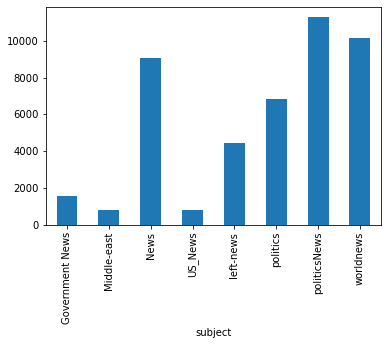

In [17]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()


target
fake    23481
true    21417
Name: text, dtype: int64


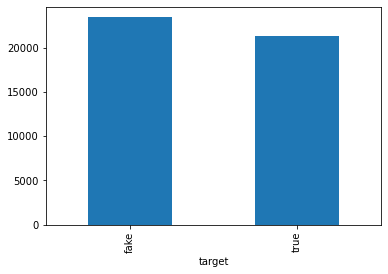

In [18]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [19]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

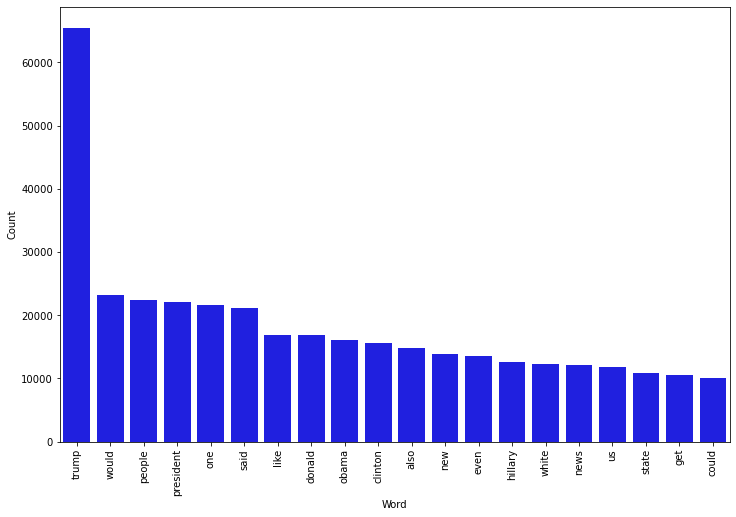

In [20]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

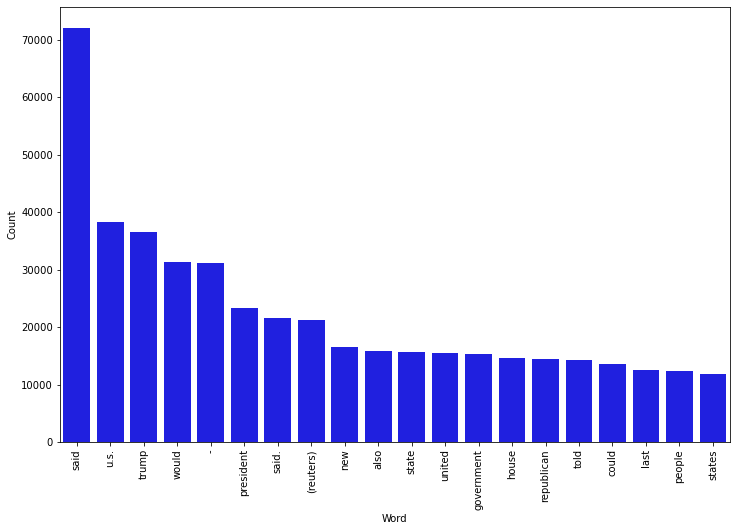

In [21]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Modeling


In [22]:
# Function to plot the confusion matrix 
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Preparing the data


In [23]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

## Logistic regression


In [24]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 99.05%


Confusion matrix, without normalization


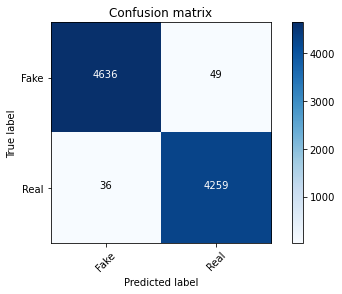

In [25]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Decision Tree Classifier


In [26]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 99.7%


Confusion matrix, without normalization


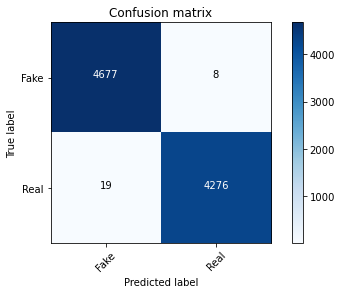

In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## Random Forest Classifier


In [28]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.3%


Confusion matrix, without normalization


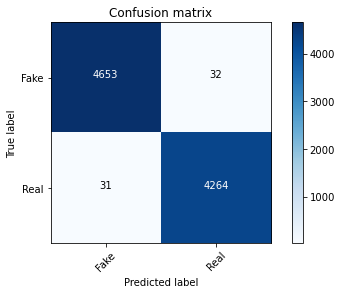

In [29]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## TfidfVectorizer

Convert a collection of raw documents to a matrix of TF-IDF features

TF-IDF where TF means term frequency, and IDF means Inverse Document frequency.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = ['Hello Hardik Sharma this side , I love machine learning','Welcome to the Machine learning hub' ]

In [31]:
vect = TfidfVectorizer()

In [33]:
vect.fit(text)

TfidfVectorizer()

In [34]:
## TF will count the frequency of word in each document. and IDF 
print(vect.idf_)

[1.40546511 1.40546511 1.40546511 1.         1.40546511 1.
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511]


In [35]:
print(vect.vocabulary_)


{'hello': 1, 'hardik': 0, 'sharma': 6, 'this': 9, 'side': 7, 'love': 4, 'machine': 5, 'learning': 3, 'welcome': 11, 'to': 10, 'the': 8, 'hub': 2}


 A word  which is present in all the data, it will have low IDF value. With this unique words will be highlighted using the Max IDF values.

In [36]:
example = text[0]
example

'Hello Hardik Sharma this side , I love machine learning'

In [37]:
example = vect.transform([example])
print(example.toarray())

[[0.37762778 0.37762778 0.         0.26868528 0.37762778 0.26868528
  0.37762778 0.37762778 0.         0.37762778 0.         0.        ]]


Here, 0 is present in the which indexed word, which is not available in given sentence.


PassiveAggressiveClassifier
Passive: if correct classification, keep the model; Aggressive: if incorrect classification, update to adjust to this misclassified example.

In [41]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(X_train)
tfid_x_test = tfvect.transform(X_test)

In [44]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [46]:
y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.54%


In [48]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [50]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism')

['true']


In [57]:
fake_news_det('On Friday, it was revealed that former Milwauk')

['fake']


In [58]:
import pickle
pickle.dump(classifier,open('model.pkl', 'wb'))

In [59]:
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [60]:
def fake_news_det1(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)

In [63]:
fake_news_det1(''''Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years.''')

['fake']


In [65]:
fake_news_det('''U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticis''')

['true']
